In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv("/content/train.csv", on_bad_lines='skip')
test = pd.read_csv("/content/test.csv", on_bad_lines='skip')

sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
submission = pd.DataFrame()

submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']
submission['Purchase'] = np.nan

In [5]:
submission

,User_ID,Product_ID,Purchase
0,1000004,P00128942,NaN
1,1000009,P00113442,NaN
2,1000010,P00288442,NaN
3,1000010,P00145342,NaN
4,1000011,P00053842,NaN
...,...,...,...
233594,1006036,P00118942,NaN
233595,1006036,P00254642,NaN
233596,1006036,P00031842,NaN
233597,1006037,P00124742,NaN


In [6]:
sales.shape

(550068, 12)

In [7]:

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:

sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
sales.User_ID.nunique()

5891

In [10]:
sales.Product_ID.nunique()

3631

In [11]:
sales.Gender.value_counts(normalize=True)*100

,proportion
Gender,
M,75.310507
F,24.689493


In [12]:
sales.Age.value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [13]:
sales.Occupation.nunique()

21

In [14]:
sales.City_Category.value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


In [15]:
sales.Stay_In_Current_City_Years.value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


In [16]:
sales.Marital_Status.value_counts()

,count
Marital_Status,
0,324731
1,225337


In [17]:
import pandas as pd
import numpy as np

# Add the 'Purchase' column to the test dataset and set it as NaN
test['Purchase'] = np.nan

# Add a 'data' column to both sales and test datasets to differentiate between them
sales['data'] = 'train'
test['data'] = 'test'

# Add missing columns in test to match sales columns (set NaN for missing values)
for col in sales.columns:
    if col not in test.columns:
        test[col] = np.nan

# Concatenate the two datasets
combined = pd.concat([sales, test], axis=0)

# Now, identify categorical and continuous columns
categorical_cols = combined.select_dtypes(include=['object', 'category']).columns
continuous_cols = combined.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)


# Define a function to remove outliers based on IQR
def remove_outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        # Calculate Q1, Q3, and IQR for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Filter out the outliers based on IQR
        df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

    return df

# Apply the function to remove outliers
combined_cleaned = remove_outliers(combined)

# Print the cleaned data
print("Data after removing outliers:")
print(combined_cleaned)


Categorical Columns: Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'data'],
      dtype='object')
Continuous Columns: Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Data after removing outliers:
        User_ID Product_ID Gender    Age  Occupation City_Category  \
1       1000001  P00248942      F   0-17          10             A   
6       1000004  P00184942      M  46-50           7             B   
13      1000005  P00145042      M  26-35          20             A   
14      1000006  P00231342      F  51-55           9             A   
16      1000006   P0096642      F  51-55           9             A   
...         ...        ...    ...    ...         ...           ...   
545902  1006039  P00064042      F  46-50           0             B   
545904  1006040  P00081142      M  26-35           6             B   
545907  1006040  P

In [18]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN,test
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN,test
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN,test


In [19]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [20]:
import pandas as pd

# Assuming 'combined' is your merged dataset (training and test data)
# If not, replace this line with your actual dataset
# combined = pd.concat([train, test], axis=0)

# Get categorical columns
categorical_cols = combined.select_dtypes(include=['object', 'category']).columns

# Get continuous columns
continuous_cols = combined.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)


Categorical Columns: Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'data'],
      dtype='object')
Continuous Columns: Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [21]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Assuming combined is your DataFrame containing the data

# List of columns to calculate skewness and kurtosis for
columns_to_check = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
                    'Product_Category_2', 'Purchase', 'Product_Category_3']

# Calculate skewness and kurtosis for each column
skewness = {}
kurt = {}

for col in columns_to_check:
    # Skip non-numeric columns
    if combined[col].dtype in ['int64', 'float64']:
        skewness[col] = skew(combined[col].dropna())
        kurt[col] = kurtosis(combined[col].dropna())

# Display the results
print("Skewness for each column:")
print(skewness)

print("\nKurtosis for each column:")
print(kurt)


Skewness for each column:
{'User_ID': np.float64(0.003011243231482955), 'Occupation': np.float64(0.39976635063607313), 'Marital_Status': np.float64(0.3669134048004682), 'Product_Category_1': np.float64(0.9865923592148412), 'Product_Category_2': np.float64(-0.16394010046188046), 'Purchase': np.float64(0.6001383671643447), 'Product_Category_3': np.float64(-0.7660122376682955)}

Kurtosis for each column:
{'User_ID': np.float64(-1.1947405946970264), 'Occupation': np.float64(-1.2169183884617647), 'Marital_Status': np.float64(-1.865374553377728), 'Product_Category_1': np.float64(1.1170430098024164), 'Product_Category_2': np.float64(-1.4321131105666969), 'Purchase': np.float64(-0.3383853975360749), 'Product_Category_3': np.float64(-0.8063694514151942)}


In [22]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Ensure test dataset is not empty before proceeding
if test.empty:
    raise ValueError("Test dataset is empty! Load test data correctly before merging.")

# Add the 'Purchase' column to the test dataset and set it as NaN
test['Purchase'] = np.nan

# Add a 'data' column to differentiate between training and test datasets
sales['data'] = 'train'
test['data'] = 'test'

# Ensure test has all columns from sales
for col in sales.columns:
    if col not in test.columns:
        test[col] = np.nan

# Concatenate datasets
combined = pd.concat([sales, test], axis=0, ignore_index=True)

# Verify dataset merging
print(combined['data'].value_counts())  # Should show counts for 'train' and 'test'

### **Outlier Removal**
# Check basic statistics before removing outliers
print(sales.describe())

# Select only numeric columns
numeric_cols = sales.select_dtypes(include=['number']).columns

# IQR-based Outlier Removal
Q1 = sales[numeric_cols].quantile(0.25)
Q3 = sales[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Set a flexible threshold (1.5 * IQR is standard)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only non-outlier data (numeric columns only)
filtered_sales = sales[
    ~((sales[numeric_cols] < lower_bound) | (sales[numeric_cols] > upper_bound)).any(axis=1)
]

# Check remaining data
if filtered_sales.empty:
    raise ValueError("All data removed! Adjust outlier filtering.")

# Update combined dataset
combined_cleaned = pd.concat([filtered_sales, test], ignore_index=True)
print(combined_cleaned['data'].value_counts())

# Identify categorical and continuous columns
categorical_cols = combined.select_dtypes(include=['object', 'category']).columns
continuous_cols = combined.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)


data
train    550068
test     233599
Name: count, dtype: int64
            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2

In [23]:
sales.isna().sum().sort_values(ascending=False)

,0
Product_Category_3,383247
Product_Category_2,173638
Gender,0
Product_ID,0
User_ID,0
Occupation,0
Age,0
City_Category,0
Stay_In_Current_City_Years,0
Product_Category_1,0


In [24]:
percent = (sales.isnull().sum()/sales.isnull().count()).sort_values(ascending=False)
percent

,0
Product_Category_3,0.696727
Product_Category_2,0.315666
Gender,0.000000
Product_ID,0.000000
User_ID,0.000000
Occupation,0.000000
Age,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Product_Category_1,0.000000


In [25]:
combined_cleaned.drop('Product_Category_3',axis=1,inplace=True)

In [26]:
combined_cleaned.Product_Category_2.value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78727
2.0,70498
16.0,61181
15.0,53398
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [27]:
vc = combined_cleaned.Product_Category_2.value_counts(normalize = True)
miss = combined_cleaned.Product_Category_2.isna()
combined_cleaned.loc[miss, 'Product_Category_2'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

In [28]:
combined_cleaned.Product_Category_2.value_counts()

,count
Product_Category_2,
8.0,132557
14.0,114456
2.0,102305
16.0,88851
15.0,77370
5.0,53868
4.0,53212
6.0,34036
11.0,29444


In [29]:
combined_cleaned.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [30]:
sales_1 = combined_cleaned[combined_cleaned['data']=='train']

In [31]:
sales_1.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase', 'data'],
      dtype='object')

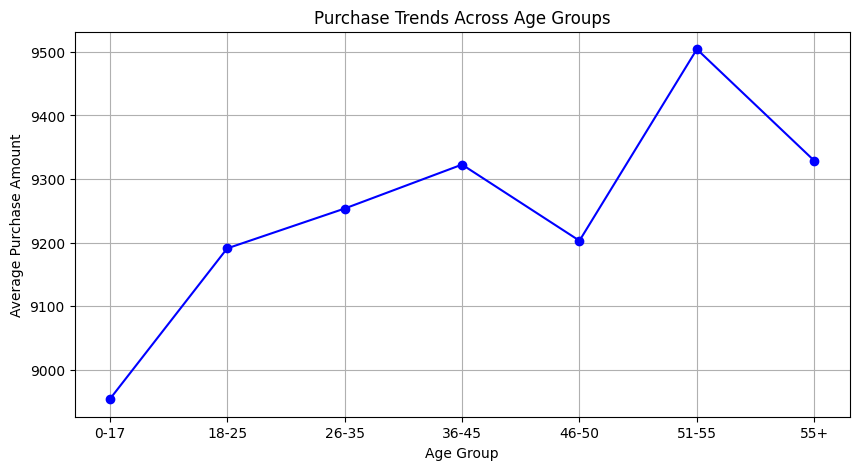

In [32]:
import matplotlib.pyplot as plt
import pandas as pd


age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sales_1['Age'] = pd.Categorical(sales_1['Age'], categories=age_order, ordered=True)

age_trend = sales_1.groupby("Age")["Purchase"].mean()


plt.figure(figsize=(10,5))
plt.plot(age_trend.index, age_trend.values, marker='o', linestyle='-', color='blue')
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")
plt.title("Purchase Trends Across Age Groups")
plt.grid()
plt.show()


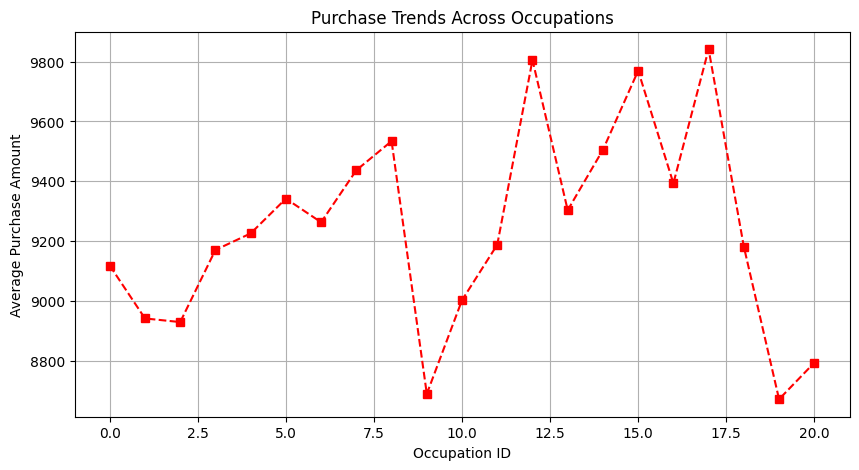

In [33]:

occupation_trend = sales_1.groupby("Occupation")["Purchase"].mean()


plt.figure(figsize=(10,5))
plt.plot(occupation_trend.index, occupation_trend.values, marker='s', linestyle='--', color='red')
plt.xlabel("Occupation ID")
plt.ylabel("Average Purchase Amount")
plt.title("Purchase Trends Across Occupations")
plt.grid()
plt.show()


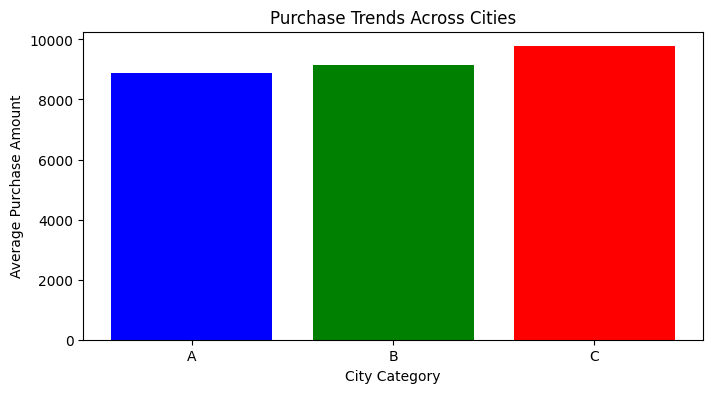

In [34]:

city_trend = sales_1.groupby("City_Category")["Purchase"].mean()


plt.figure(figsize=(8,4))
plt.bar(city_trend.index, city_trend.values, color=['blue', 'green', 'red'])
plt.xlabel("City Category")
plt.ylabel("Average Purchase Amount")
plt.title("Purchase Trends Across Cities")
plt.show()


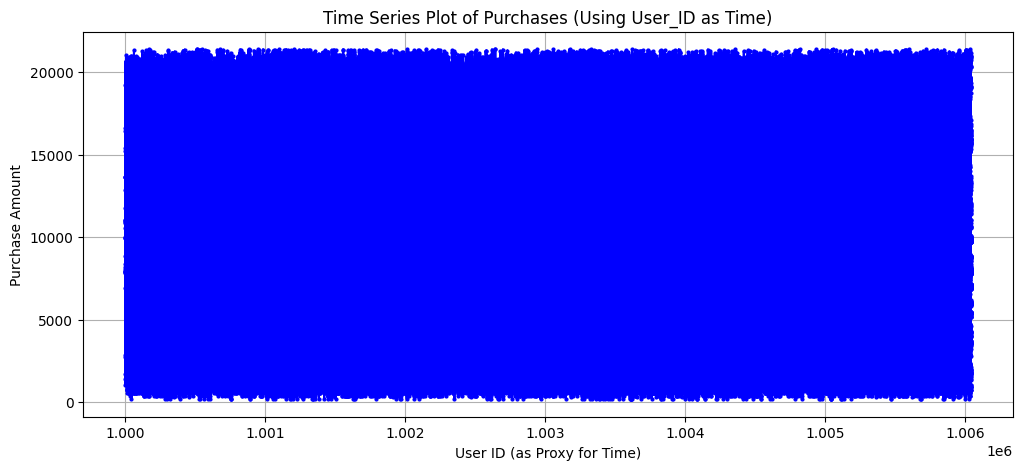

In [35]:
import matplotlib.pyplot as plt

# Sorting by User_ID (assuming it's sequential)
sales_1_sorted = sales_1.sort_values(by="User_ID")

# Plot
plt.figure(figsize=(12,5))
plt.plot(sales_1_sorted['User_ID'], sales_1_sorted['Purchase'], color='blue', linestyle='-', marker='o', markersize=2)
plt.xlabel("User ID (as Proxy for Time)")
plt.ylabel("Purchase Amount")
plt.title("Time Series Plot of Purchases (Using User_ID as Time)")
plt.grid()
plt.show()


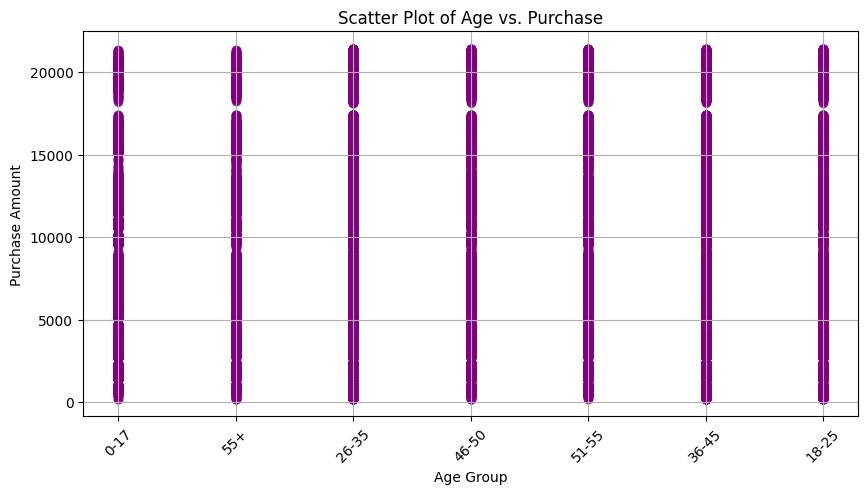

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Age to an ordered category for proper sorting
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sales_1['Age'] = pd.Categorical(sales_1['Age'], categories=age_order, ordered=True)

# Scatter Plot
plt.figure(figsize=(10,5))
plt.scatter(sales_1['Age'], sales_1['Purchase'], alpha=0.5, color='purple')
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")
plt.title("Scatter Plot of Age vs. Purchase")
plt.xticks(rotation=45)
plt.grid()
plt.show()


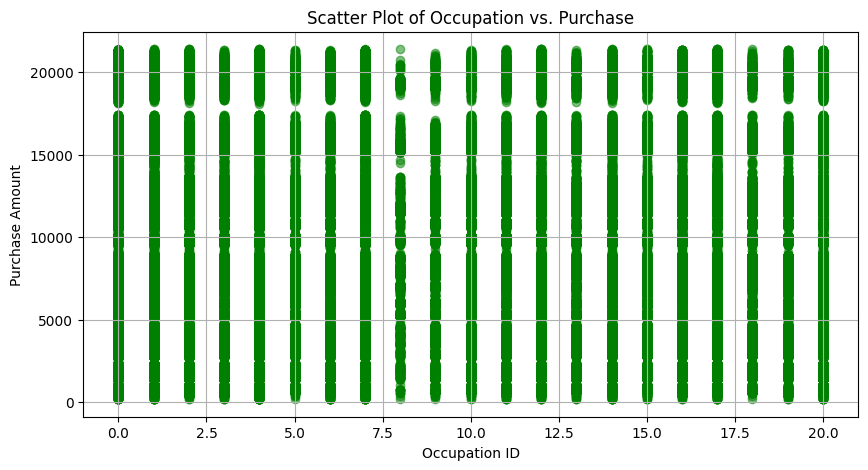

In [37]:
# Scatter Plot
plt.figure(figsize=(10,5))
plt.scatter(sales_1['Occupation'], sales_1['Purchase'], alpha=0.5, color='green')
plt.xlabel("Occupation ID")
plt.ylabel("Purchase Amount")
plt.title("Scatter Plot of Occupation vs. Purchase")
plt.grid()
plt.show()


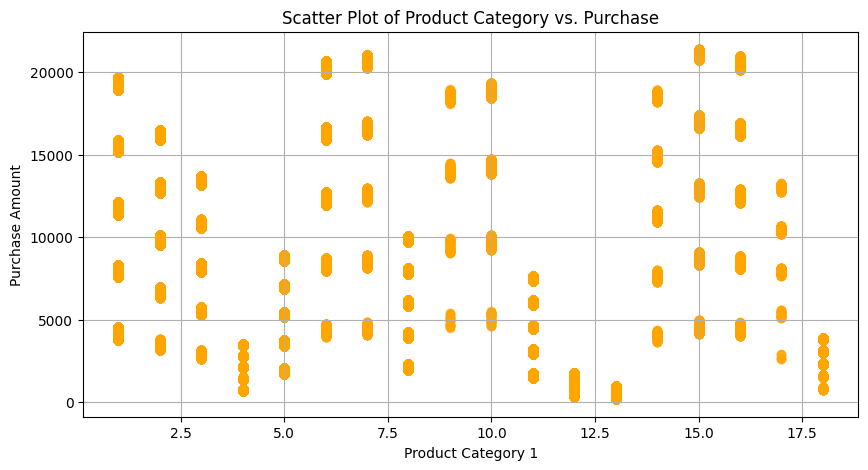

In [38]:
# Scatter Plot
plt.figure(figsize=(10,5))
plt.scatter(sales_1['Product_Category_1'], sales_1['Purchase'], alpha=0.5, color='orange')
plt.xlabel("Product Category 1")
plt.ylabel("Purchase Amount")
plt.title("Scatter Plot of Product Category vs. Purchase")
plt.grid()
plt.show()


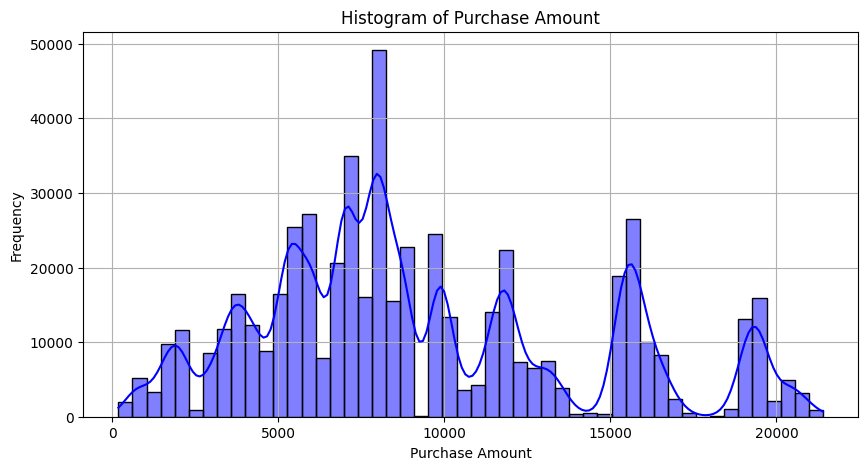

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Purchase Amount
plt.figure(figsize=(10,5))
sns.histplot(sales_1['Purchase'], bins=50, kde=True, color='blue')
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Purchase Amount")
plt.grid()
plt.show()


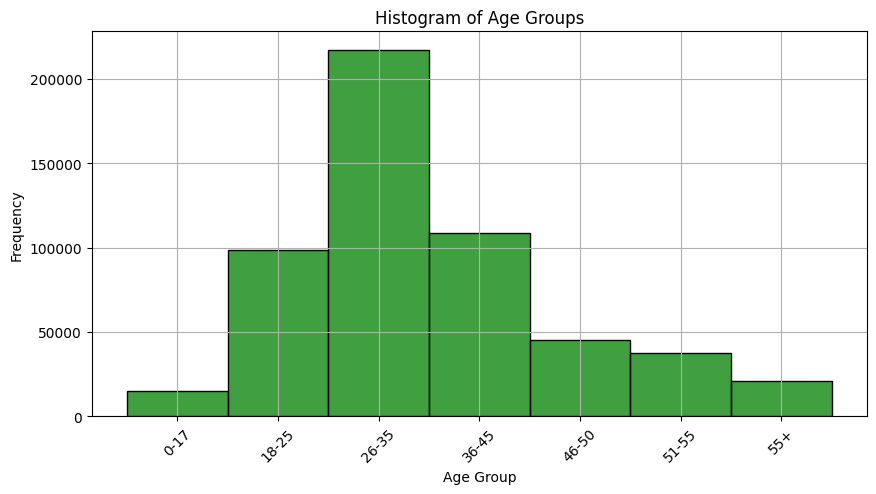

In [40]:
# Histogram of Age Groups
plt.figure(figsize=(10,5))
sns.histplot(sales_1['Age'], bins=len(sales_1['Age'].unique()), kde=False, color='green')
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Histogram of Age Groups")
plt.xticks(rotation=45)
plt.grid()
plt.show()


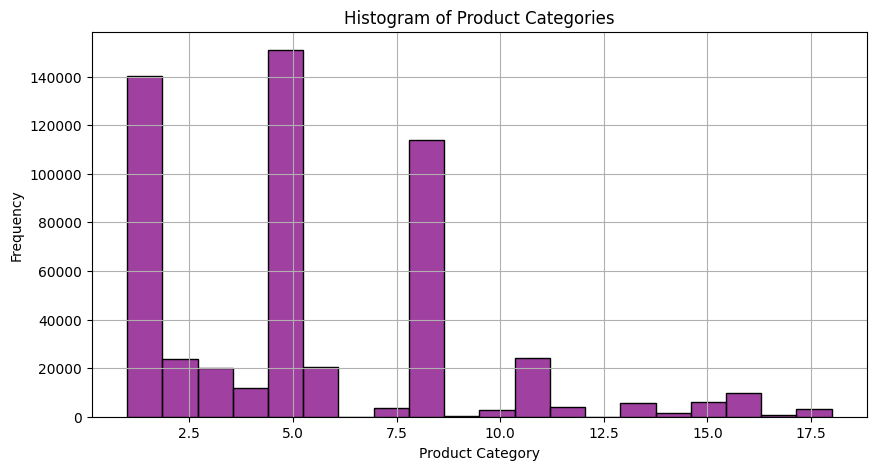

In [41]:
# Histogram of Product Category 1
plt.figure(figsize=(10,5))
sns.histplot(sales_1['Product_Category_1'], bins=20, kde=False, color='purple')
plt.xlabel("Product Category")
plt.ylabel("Frequency")
plt.title("Histogram of Product Categories")
plt.grid()
plt.show()


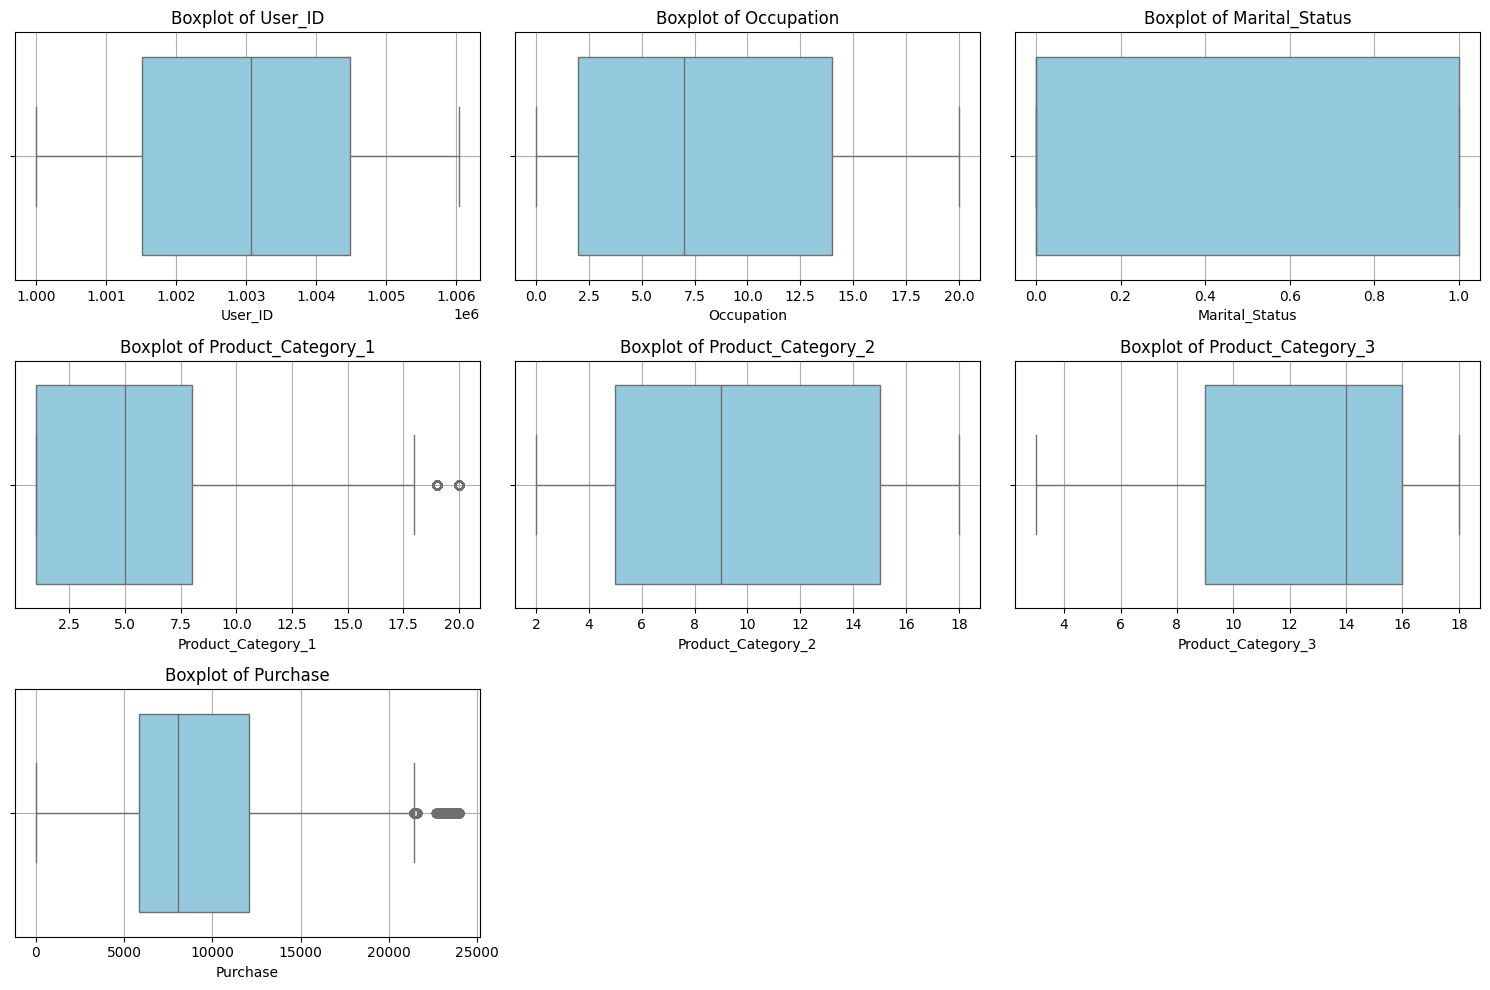

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined' is your dataset
# Get all numeric columns
numeric_cols = combined.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for all numeric columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid size as needed
    sns.boxplot(x=combined[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.grid(True)

plt.tight_layout()
plt.show()



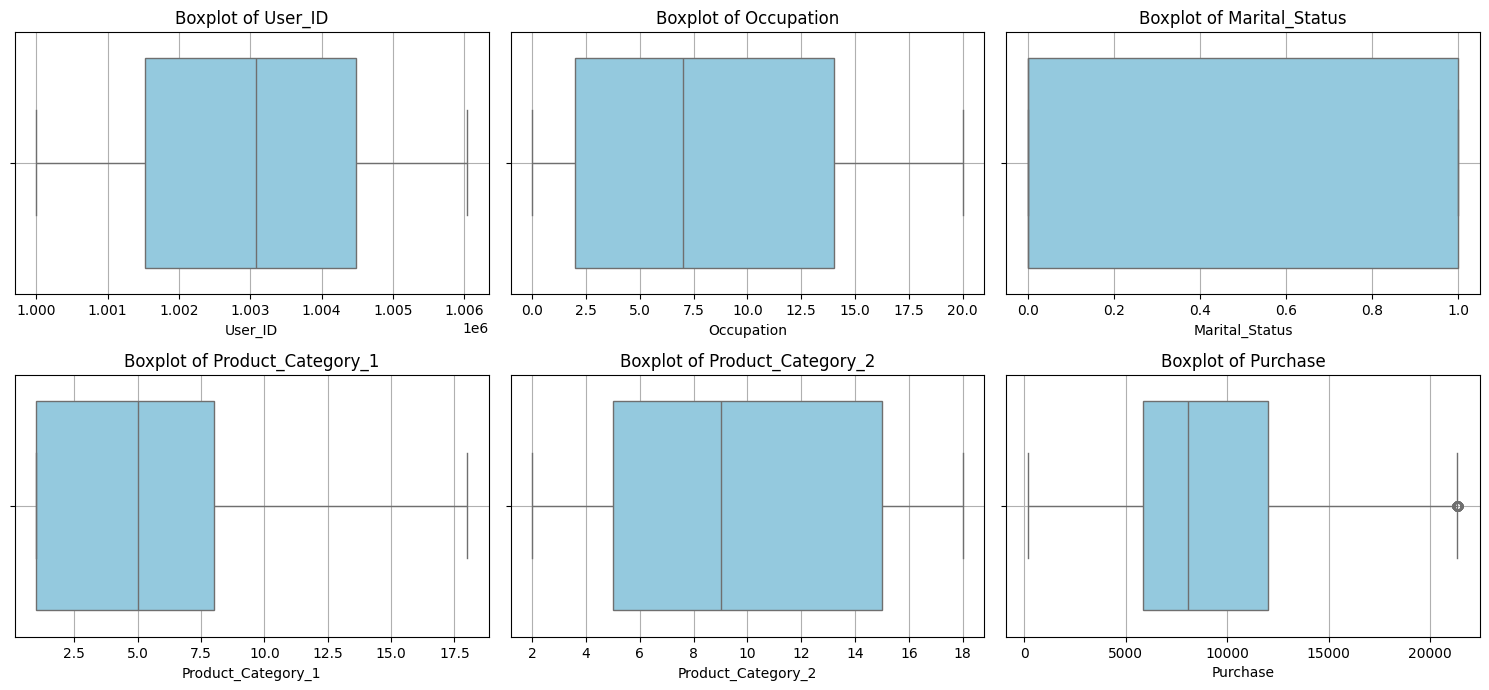

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined' is your dataset
# Get all numeric columns
numeric_cols = combined_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for all numeric columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid size as needed
    sns.boxplot(x=combined_cleaned[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.grid(True)

plt.tight_layout()
plt.show()



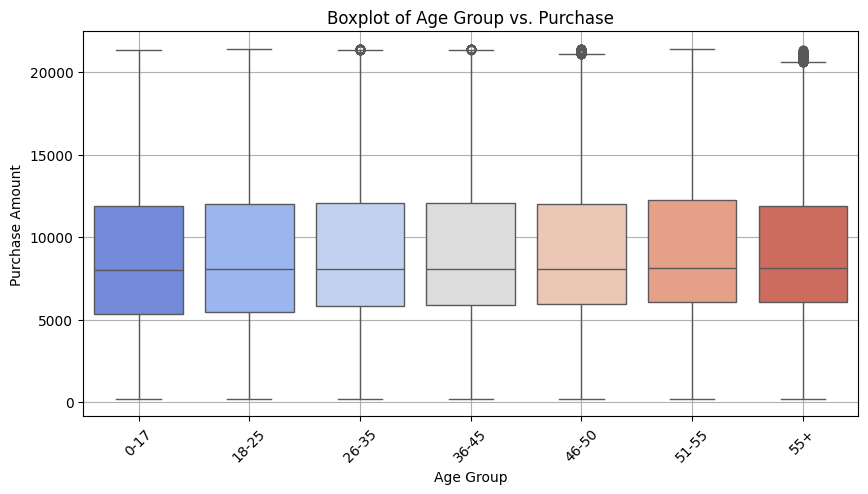

In [44]:
# Boxplot for Age Group Purchases
plt.figure(figsize=(10,5))
sns.boxplot(x=sales_1['Age'], y=sales_1['Purchase'], palette="coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")
plt.title("Boxplot of Age Group vs. Purchase")
plt.xticks(rotation=45)
plt.grid()
plt.show()


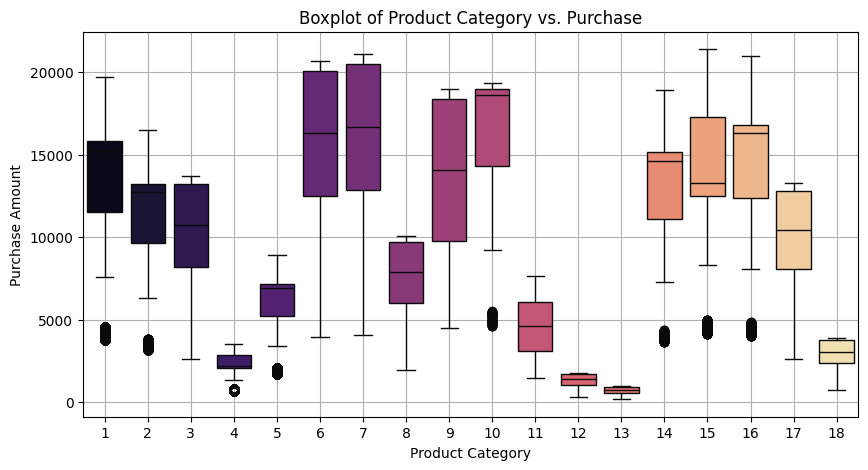

In [45]:
# Boxplot for Product Category 1 Purchases
plt.figure(figsize=(10,5))
sns.boxplot(x=sales_1['Product_Category_1'], y=sales_1['Purchase'], palette="magma")
plt.xlabel("Product Category")
plt.ylabel("Purchase Amount")
plt.title("Boxplot of Product Category vs. Purchase")
plt.grid()
plt.show()


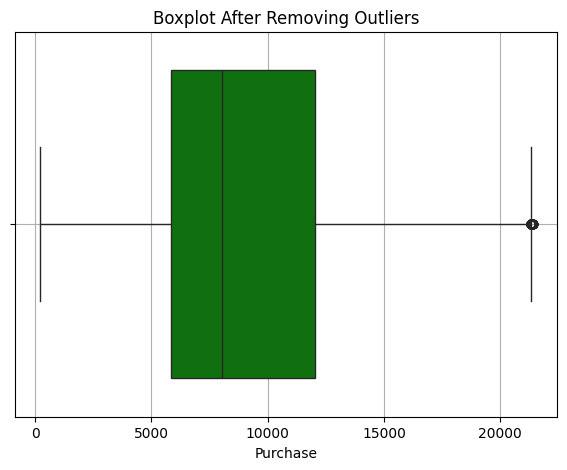

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(x=sales_1['Purchase'], color='green')
plt.title("Boxplot After Removing Outliers")
plt.grid()
plt.show()


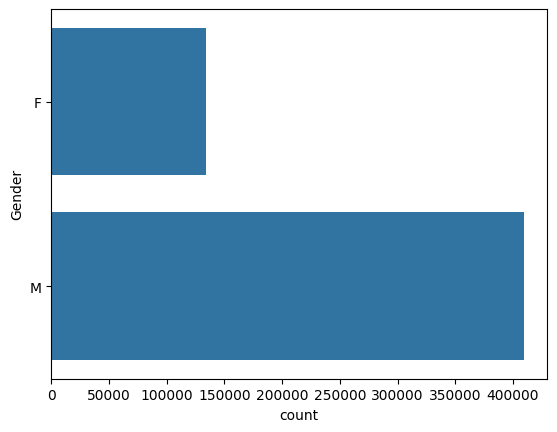

In [47]:
sns.countplot(sales_1['Gender'])


plt.show()

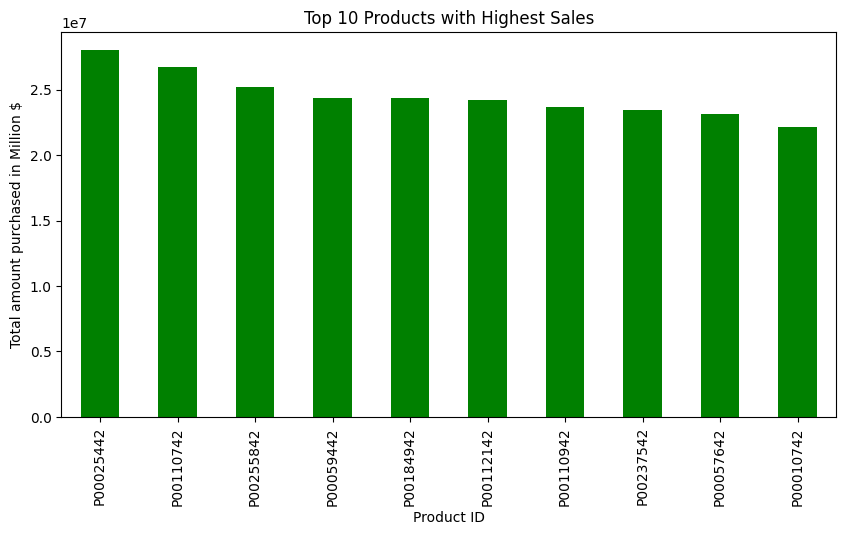

In [48]:
sales_1['Product_ID'] = sales_1['Product_ID'].astype(str)  # Convert to string

data = sales_1 .groupby("Product_ID")['Purchase'].sum()  # Sum purchases

plt.figure(figsize=(10,5))
data.sort_values(ascending=False)[0:10].plot(kind='bar', color='green')  # Top 10 products
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased in Million $')
plt.title('Top 10 Products with Highest Sales')
plt.show()


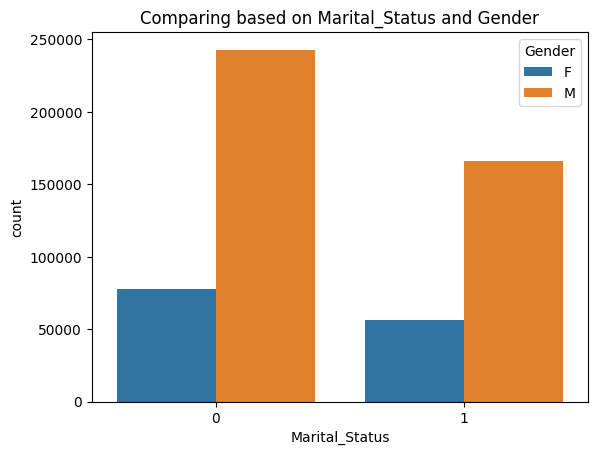

In [49]:

sns.countplot(x='Marital_Status',data=sales_1,hue='Gender')
plt.title('Comparing based on Marital_Status and Gender')
plt.show()

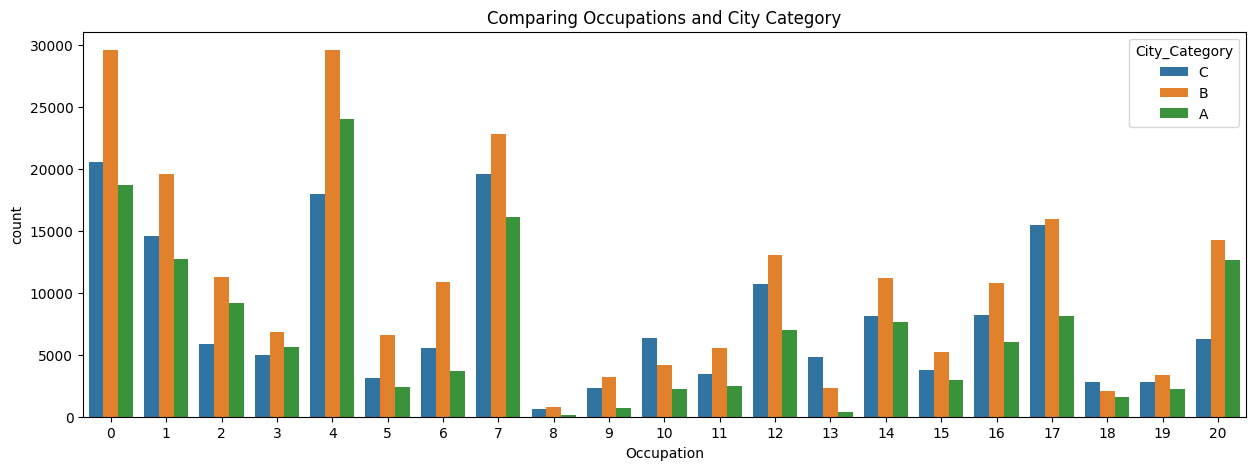

In [50]:
#Occupations and City Category

plt.figure(figsize=(15,5))
sns.countplot(x='Occupation',data=sales_1,hue='City_Category')
plt.title('Comparing Occupations and City Category')
plt.show()

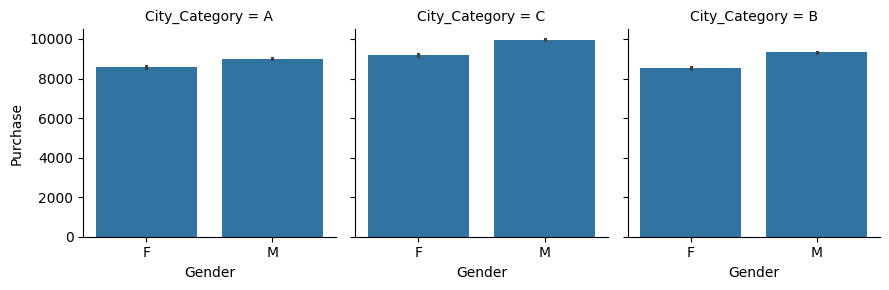

In [51]:
g = sns.FacetGrid(sales_1,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase")
plt.show()

In [52]:
a =pd.crosstab(sales_1['Age'],sales_1['Product_ID'])
a.idxmax(axis=1)

,0
Age,
0-17,P00255842
18-25,P00265242
26-35,P00265242
36-45,P00025442
46-50,P00265242
51-55,P00265242
55+,P00265242


In [53]:
combined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776837 entries, 0 to 776836
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     776837 non-null  int64  
 1   Product_ID                  776837 non-null  object 
 2   Gender                      776837 non-null  object 
 3   Age                         776837 non-null  object 
 4   Occupation                  776837 non-null  int64  
 5   City_Category               776837 non-null  object 
 6   Stay_In_Current_City_Years  776837 non-null  object 
 7   Marital_Status              776837 non-null  int64  
 8   Product_Category_1          776837 non-null  int64  
 9   Product_Category_2          776837 non-null  float64
 10  Purchase                    543238 non-null  float64
 11  data                        776837 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 71.1+ MB


In [54]:
combined_cleaned.Product_Category_2 = combined_cleaned.Product_Category_2.astype('int64')
# features with datatype object

cat_cols = combined_cleaned.select_dtypes(['object']).columns
cat_cols


Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'data'],
      dtype='object')

In [55]:
combined_cleaned['Stay_In_Current_City_Years'] = combined_cleaned['Stay_In_Current_City_Years'].astype(str)

combined_cleaned['Stay_In_Current_City_Years'] = np.where(
    combined_cleaned['Stay_In_Current_City_Years'].str[:2] == "4+",
    4,
    combined_cleaned['Stay_In_Current_City_Years']
)

# Convert to integer
combined_cleaned['Stay_In_Current_City_Years'] = pd.to_numeric(combined_cleaned['Stay_In_Current_City_Years'], errors='coerce')


In [56]:
combined_cleaned['Gender'] = combined_cleaned['Gender'].map({'F':0, 'M':1}).astype(int)

In [57]:
combined_cleaned['Age'] = combined_cleaned['Age'].map({'0-17': 9,
                               '18-25': 22,
                               '26-35': 31,
                               '36-45': 42,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})
combined_cleaned['Age'].value_counts()

,count
Age,
31,310628
42,155294
22,140883
48,64643
53,54140
60,30134
9,21115


In [58]:
print(combined_cleaned.columns)


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase', 'data'],
      dtype='object')


In [59]:
combined_cleaned= pd.get_dummies(combined_cleaned, columns=['City_Category'], drop_first=True)
print(combined_cleaned.head())


   User_ID Product_ID  Gender  Age  Occupation  Stay_In_Current_City_Years  \
0  1000001  P00069042       0    9          10                           2   
1  1000001  P00248942       0    9          10                           2   
2  1000001  P00087842       0    9          10                           2   
3  1000001  P00085442       0    9          10                           2   
4  1000002  P00285442       1   60          16                           4   

   Marital_Status  Product_Category_1  Product_Category_2  Purchase   data  \
0               0                   3                  14    8370.0  train   
1               0                   1                   6   15200.0  train   
2               0                  12                   8    1422.0  train   
3               0                  12                  14    1057.0  train   
4               0                   8                   4    7969.0  train   

   City_Category_B  City_Category_C  
0            False      

In [60]:
combined_cleaned.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1000001,P00069042,0,9,10,2,0,3,14,8370.0,train,False,False
1,1000001,P00248942,0,9,10,2,0,1,6,15200.0,train,False,False
2,1000001,P00087842,0,9,10,2,0,12,8,1422.0,train,False,False
3,1000001,P00085442,0,9,10,2,0,12,14,1057.0,train,False,False
4,1000002,P00285442,1,60,16,4,0,8,4,7969.0,train,False,True


In [61]:


sales= combined_cleaned[combined_cleaned['data']=='train']
del sales['data']
test_input = combined_cleaned[combined_cleaned['data']=='test']
test_input.drop(['Purchase','data'],axis=1,inplace=True)

del combined

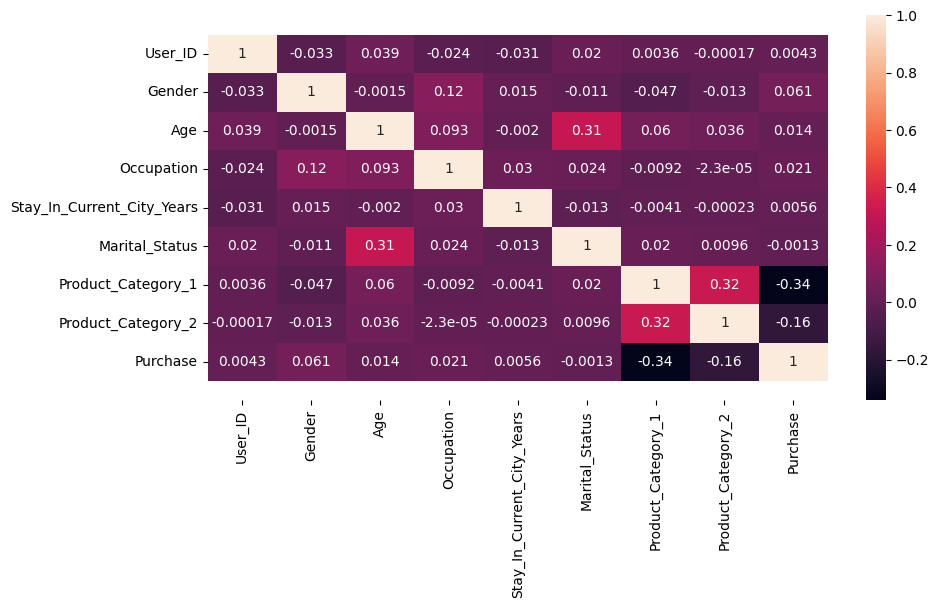

In [62]:

numeric_sales = sales.select_dtypes(include=['number'])


cor = numeric_sales.corr()

plt.figure(figsize=(10, 5))
ax = sns.heatmap(cor, annot=True)


bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()


In [63]:
X = sales.drop('Purchase',axis=1)
y = sales['Purchase']

#train test split for model building
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)
#Linear regression




In [64]:
print(X_train.columns)  # Check available columns
print(X_test.columns)


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'City_Category_B', 'City_Category_C'],
      dtype='object')
Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'City_Category_B', 'City_Category_C'],
      dtype='object')


In [65]:
X_train['Stay_In_Current_City_Years'] = X_train['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)
X_test['Stay_In_Current_City_Years'] = X_test['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)


In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender','City_Category_B','City_Category_C']:  # Add other categorical columns if needed
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Combine train and test sets for consistent encoding
all_product_ids = pd.concat([X_train['Product_ID'], X_test['Product_ID']], axis=0)

# Fit on the combined data and transform separately
le.fit(all_product_ids)

X_train['Product_ID'] = le.transform(X_train['Product_ID'])
X_test['Product_ID'] = le.transform(X_test['Product_ID'])


In [87]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.power import TTestPower

lr = LinearRegression()
lr.fit(X_train,y_train) # training the algorithm

# Getting the coefficients and intercept

print('coefficients:\n', lr.coef_)
print('\n intercept:', lr.intercept_)


y_pred_lr = lr.predict(X_test)

from sklearn import metrics

print('lr_r2_score:', metrics.r2_score(y_test,y_pred_lr))
print('lr_rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)))

z_stat, p_value = ztest(y_test, y_pred_lr)

print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")  # If p < 0.05, significant difference exists

t_stat, p_value = ttest_ind(y_test, y_pred_lr)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")  # If p < 0.05, there is a significant difference

f_stat, p_value = f_oneway(y_test, y_pred_lr)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")  # If p < 0.05, at least one group is different
alpha = 0.05  # Probability of Type 1 Error
print(f"Type 1 Error Probability (α): {alpha}")
from statsmodels.stats.power import TTestPower

# Calculate effect size (difference between means divided by standard deviation)
effect_size = abs(np.mean(y_test) - np.mean(y_pred_lr)) / np.std(y_test)

# Define test parameters
power_analysis = TTestPower()
beta = 1 - power_analysis.solve_power(effect_size=effect_size, nobs=len(y_test), alpha=alpha)

print(f"Type 2 Error Probability (β): {beta}")
print(f"Power of the test: {1 - beta}")  # Should be >= 0.8 for good power


coefficients:
 [ 8.84753782e-03 -3.47381350e-01  5.31644073e+02  1.40163048e+01
  4.97524468e+00  1.76130171e+01 -5.05223162e+01 -4.16114940e+02
 -5.82739702e+01  1.75394061e+02  7.19260056e+02]

 intercept: 2503.0432370064655
lr_r2_score: 0.13185805244420357
lr_rmse: 4558.139227651908
Z-Statistic: 0.2629850030716554
P-Value: 0.7925621381977812
T-Statistic: 0.2629850030716554
P-Value: 0.7925623044224825
F-Statistic: 0.06916111184069137
P-Value: 0.7925623044248776
Type 1 Error Probability (α): 0.05
Type 2 Error Probability (β): 0.9409836218926144
Power of the test: 0.05901637810738558


In [88]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Normalize the features manually
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression
RR = Ridge(alpha=0.05)
RR.fit(X_train_scaled, y_train)

# Predict
y_pred_ridge = RR.predict(X_test_scaled)

# Calculate RMSE
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
print('RMSE:', rmse_ridge)
print('r2 score:',np.sqrt(metrics.r2_score(y_test, y_pred_ridge)))
z_stat_rr, p_value_rr = ztest(y_test, y_pred_ridge)
print(f"Z-Statistic Ridge: {z_stat_rr}")
print(f"P-Value Ridge: {p_value_rr}")  # If p < 0.05, significant difference exists
t_stat_rr, p_value_rr_t = ttest_ind(y_test, y_pred_ridge)
print(f"T-Statistic Ridge: {t_stat_rr}")
print(f"P-Value Ridge: {p_value_rr_t}")
f_stat_rr, p_value_rr_anova = f_oneway(y_test, y_pred_ridge)
print(f"F-Statistic Ridge: {f_stat_rr}")
print(f"P-Value Ridge: {p_value_rr_anova}")
# Type 1 Error (False Positive)
alpha_rr = 0.05  # Significance level (5%)
print(f"Type 1 Error Probability (α Ridge): {alpha_rr}")

# Type 2 Error (False Negative)
effect_size_rr = abs(np.mean(y_test) - np.mean(y_pred_ridge)) / np.std(y_test)

# Compute Power & Type 2 Error
power_analysis_rr = TTestPower()
beta_rr = 1 - power_analysis_rr.solve_power(effect_size=effect_size_rr, nobs=len(y_test), alpha=alpha_rr)

print(f"Type 2 Error Probability (β Ridge): {beta_rr}")
print(f"Power of Ridge Regression Test: {1 - beta_rr}")


RMSE: 4558.1392274880845
r2 score: 0.36312264113740855
Z-Statistic Ridge: 0.2629850225818878
P-Value Ridge: 0.7925621231599794
T-Statistic Ridge: 0.2629850225818878
P-Value Ridge: 0.7925622893846938
F-Statistic Ridge: 0.06916112210234274
P-Value Ridge: 0.792562289417745
Type 1 Error Probability (α Ridge): 0.05
Type 2 Error Probability (β Ridge): 0.9409836207963511
Power of Ridge Regression Test: 0.05901637920364888


In [89]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

DT.fit(X_train, y_train)

y_pred_dt= DT.predict(X_test)

print('rmse_dt:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt)))
print('r2_dt:', np.sqrt(metrics.r2_score(y_test,y_pred_dt)))

z_stat_dt, p_value_dt = ztest(y_test, y_pred_dt)
print(f"Z-Statistic Decision Tree: {z_stat_dt}")
print(f"P-Value Decision Tree: {p_value_dt}")  # If p < 0.05, significant difference exists
t_stat_dt, p_value_dt_t = ttest_ind(y_test, y_pred_dt)
print(f"T-Statistic Decision Tree: {t_stat_dt}")
print(f"P-Value Decision Tree: {p_value_dt_t}")
f_stat_dt, p_value_dt_anova = f_oneway(y_test, y_pred_dt)
print(f"F-Statistic Decision Tree: {f_stat_dt}")
print(f"P-Value Decision Tree: {p_value_dt_anova}")
# Type 1 Error (False Positive)
alpha_dt = 0.05  # Significance level (5%)
print(f"Type 1 Error Probability (α Decision Tree): {alpha_dt}")

# Type 2 Error (False Negative)
effect_size_dt = abs(np.mean(y_test) - np.mean(y_pred_dt)) / np.std(y_test)

# Compute Power & Type 2 Error
power_analysis_dt = TTestPower()
beta_dt = 1 - power_analysis_dt.solve_power(effect_size=effect_size_dt, nobs=len(y_test), alpha=alpha_dt)

print(f"Type 2 Error Probability (β Decision Tree): {beta_dt}")
print(f"Power of Decision Tree Regression Test: {1 - beta_dt}")


rmse_dt: 2747.6761747319674
r2_dt: 0.8273682867689421
Z-Statistic Decision Tree: 0.18686175568107724
P-Value Decision Tree: 0.8517690255231405
T-Statistic Decision Tree: 0.18686175568107724
P-Value Decision Tree: 0.8517691418241418
F-Statistic Decision Tree: 0.03491731573617076
P-Value Decision Tree: 0.8517691417952951
Type 1 Error Probability (α Decision Tree): 0.05
Type 2 Error Probability (β Decision Tree): 0.9432023079394061
Power of Decision Tree Regression Test: 0.05679769206059393


In [90]:
DT2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)

DT2.fit(X_train, y_train)

y_pred_dt2 = DT2.predict(X_test)

print('rmse_dt2:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt2)))
print('r2_dt:', np.sqrt(metrics.r2_score(y_test,y_pred_dt2)))

z_stat_dt2, p_value_dt2 = ztest(y_test, y_pred_dt2)
print(f"Z-Statistic Decision Tree (DT2): {z_stat_dt2}")
print(f"P-Value Decision Tree (DT2): {p_value_dt2}")  # If p < 0.05, significant difference exists
t_stat_dt2, p_value_dt2_t = ttest_ind(y_test, y_pred_dt2)
print(f"T-Statistic Decision Tree (DT2): {t_stat_dt2}")
print(f"P-Value Decision Tree (DT2): {p_value_dt2_t}")
f_stat_dt2, p_value_dt2_anova = f_oneway(y_test, y_pred_dt2)
print(f"F-Statistic Decision Tree (DT2): {f_stat_dt2}")
print(f"P-Value Decision Tree (DT2): {p_value_dt2_anova}")
# Type 1 Error (False Positive)
alpha_dt2 = 0.05  # Significance level (5%)
print(f"Type 1 Error Probability (α Decision Tree DT2): {alpha_dt2}")

# Type 2 Error (False Negative)
effect_size_dt2 = abs(np.mean(y_test) - np.mean(y_pred_dt2)) / np.std(y_test)

# Compute Power & Type 2 Error
power_analysis_dt2 = TTestPower()
beta_dt2 = 1 - power_analysis_dt2.solve_power(effect_size=effect_size_dt2, nobs=len(y_test), alpha=alpha_dt2)

print(f"Type 2 Error Probability (β Decision Tree DT2): {beta_dt2}")
print(f"Power of Decision Tree Regression Test (DT2): {1 - beta_dt2}")


rmse_dt2: 2870.882932197607
r2_dt: 0.8096994318140357
Z-Statistic Decision Tree (DT2): 0.21295965857886712
P-Value Decision Tree (DT2): 0.8313584286701093
T-Statistic Decision Tree (DT2): 0.21295965857886712
P-Value Decision Tree (DT2): 0.8313585618538996
F-Statistic Decision Tree (DT2): 0.04535181618195421
P-Value Decision Tree (DT2): 0.8313585618786025
Type 1 Error Probability (α Decision Tree DT2): 0.05
Type 2 Error Probability (β Decision Tree DT2): 0.9413492179663546
Power of Decision Tree Regression Test (DT2): 0.05865078203364538


In [91]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 3,max_depth=10,n_estimators=25)

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred_rf))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

z_stat_rf, p_value_rf = ztest(y_test, y_pred_rf)
print(f"Z-Statistic Random Forest (RF): {z_stat_rf}")
print(f"P-Value Random Forest (RF): {p_value_rf}")  # If p < 0.05, significant difference exists
t_stat_rf, p_value_rf_t = ttest_ind(y_test, y_pred_rf)
print(f"T-Statistic Random Forest (RF): {t_stat_rf}")
print(f"P-Value Random Forest (RF): {p_value_rf_t}")
f_stat_rf, p_value_rf_anova = f_oneway(y_test, y_pred_rf)
print(f"F-Statistic Random Forest (RF): {f_stat_rf}")
print(f"P-Value Random Forest (RF): {p_value_rf_anova}")
# Type 1 Error (False Positive)
alpha_rf = 0.05  # Significance level (5%)
print(f"Type 1 Error Probability (α Random Forest RF): {alpha_rf}")

# Type 2 Error (False Negative)
effect_size_rf = abs(np.mean(y_test) - np.mean(y_pred_rf)) / np.std(y_test)

# Compute Power & Type 2 Error
power_analysis_rf = TTestPower()
beta_rf = 1 - power_analysis_rf.solve_power(effect_size=effect_size_rf, nobs=len(y_test), alpha=alpha_rf)

print(f"Type 2 Error Probability (β Random Forest RF): {beta_rf}")
print(f"Power of Random Forest Regression Test (RF): {1 - beta_rf}")


r2_score: 0.6745982721164413
rmse: 2790.6292578862685
Z-Statistic Random Forest (RF): 0.07993546662171794
P-Value Random Forest (RF): 0.9362885817854193
T-Statistic Random Forest (RF): 0.07993546662171794
P-Value Random Forest (RF): 0.9362886308601319
F-Statistic Random Forest (RF): 0.006389678824028958
P-Value Random Forest (RF): 0.9362886310280867
Type 1 Error Probability (α Random Forest RF): 0.05
Type 2 Error Probability (β Random Forest RF): 0.9487802614747018
Power of Random Forest Regression Test (RF): 0.05121973852529815


In [92]:
from sklearn.ensemble import RandomForestRegressor

rf3 = RandomForestRegressor(random_state=3,max_depth=10,min_samples_split=500,oob_score=True)


rf3.fit(X_train,y_train)

y_pred_rf3 = rf3.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred_rf3))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf3)))
z_stat_rf3, p_value_rf3 = ztest(y_test, y_pred_rf3)
print(f"Z-Statistic RF3: {z_stat_rf3}")
print(f"P-Value RF3: {p_value_rf3}")  # If p < 0.05, significant difference exists
t_stat_rf3, p_value_rf3_t = ttest_ind(y_test, y_pred_rf3)
print(f"T-Statistic RF3: {t_stat_rf3}")
print(f"P-Value RF3: {p_value_rf3_t}")
f_stat_rf3, p_value_rf3_anova = f_oneway(y_test, y_pred_rf3)
print(f"F-Statistic RF3: {f_stat_rf3}")
print(f"P-Value RF3: {p_value_rf3_anova}")
# Type 1 Error (False Positive)
alpha_rf3 = 0.05  # Significance level (5%)
print(f"Type 1 Error Probability (α RF3): {alpha_rf3}")

# Type 2 Error (False Negative)
effect_size_rf3 = abs(np.mean(y_test) - np.mean(y_pred_rf3)) / np.std(y_test)

# Compute Power & Type 2 Error
power_analysis_rf3 = TTestPower()
beta_rf3 = 1 - power_analysis_rf3.solve_power(effect_size=effect_size_rf3, nobs=len(y_test), alpha=alpha_rf3)

print(f"Type 2 Error Probability (β RF3): {beta_rf3}")
print(f"Power of RF3 Test: {1 - beta_rf3}")


r2_score: 0.6716345134847306
rmse: 2803.3089759433547
Z-Statistic RF3: 0.1898117777833584
P-Value RF3: 0.84945662634369
T-Statistic RF3: 0.1898117777833584
P-Value RF3: 0.8494567445419126
F-Statistic RF3: 0.03602851098530088
P-Value RF3: 0.8494567445288088
Type 1 Error Probability (α RF3): 0.05
Type 2 Error Probability (β RF3): 0.9431183095883041
Power of RF3 Test: 0.056881690411695884


In [93]:
rf4 = RandomForestRegressor(n_estimators=30,random_state=3,max_depth=15,min_samples_split=100,oob_score=True)


rf4.fit(X_train,y_train)

y_pred_rf4 = rf4.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred_rf4))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf4)))

z_stat_rf4, p_value_rf4 = ztest(y_test, y_pred_rf4)
print(f"Z-Statistic RF4: {z_stat_rf4}")
print(f"P-Value RF4: {p_value_rf4}")  # If p < 0.05, significant difference exists
t_stat_rf4, p_value_rf4_t = ttest_ind(y_test, y_pred_rf4)
print(f"T-Statistic RF4: {t_stat_rf4}")
print(f"P-Value RF4: {p_value_rf4_t}")
f_stat_rf4, p_value_rf4_anova = f_oneway(y_test, y_pred_rf4)
print(f"F-Statistic RF4: {f_stat_rf4}")
print(f"P-Value RF4: {p_value_rf4_anova}")
# Type 1 Error (False Positive)
alpha_rf4 = 0.05  # Significance level (5%)
print(f"Type 1 Error Probability (α RF4): {alpha_rf4}")

# Type 2 Error (False Negative)
effect_size_rf4 = abs(np.mean(y_test) - np.mean(y_pred_rf4)) / np.std(y_test)

# Compute Power & Type 2 Error
power_analysis_rf4 = TTestPower()
beta_rf4 = 1 - power_analysis_rf4.solve_power(effect_size=effect_size_rf4, nobs=len(y_test), alpha=alpha_rf4)

print(f"Type 2 Error Probability (β RF4): {beta_rf4}")
print(f"Power of RF4 Test: {1 - beta_rf4}")



r2_score: 0.6948220171448883
rmse: 2702.519367019242
Z-Statistic RF4: 0.09693315470424796
P-Value RF4: 0.9227794791275389
T-Statistic RF4: 0.09693315470424796
P-Value RF4: 0.922779538725746
F-Statistic RF4: 0.00939603648091132
P-Value RF4: 0.922779538582564
Type 1 Error Probability (α RF4): 0.05
Type 2 Error Probability (β RF4): 0.948181752693875
Power of RF4 Test: 0.051818247306125054


In [95]:
from xgboost import XGBRegressor


xgb1 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

xgb1.fit(X_train,y_train)

y_pred_xgb_1 = xgb1.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred_xgb_1))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb_1)))

z_stat_xgb1, p_value_xgb1 = ztest(y_test, y_pred_xgb_1)
print(f"Z-Statistic XGB1: {z_stat_xgb1}")
print(f"P-Value XGB1: {p_value_xgb1}")  # If p < 0.05, significant difference exists
t_stat_xgb1, p_value_xgb1_t = ttest_ind(y_test, y_pred_xgb_1)
print(f"T-Statistic XGB1: {t_stat_xgb1}")
print(f"P-Value XGB1: {p_value_xgb1_t}")
f_stat_xgb1, p_value_xgb1_anova = f_oneway(y_test, y_pred_xgb_1)
print(f"F-Statistic XGB1: {f_stat_xgb1}")
print(f"P-Value XGB1: {p_value_xgb1_anova}")
# Type 1 Error (False Positive)
alpha_xgb1 = 0.05  # Significance level (5%)
print(f"Type 1 Error Probability (α XGB1): {alpha_xgb1}")

# Type 2 Error (False Negative)
effect_size_xgb1 = abs(np.mean(y_test) - np.mean(y_pred_xgb_1)) / np.std(y_test)

# Compute Power & Type 2 Error
power_analysis_xgb1 = TTestPower()
beta_xgb1 = 1 - power_analysis_xgb1.solve_power(effect_size=effect_size_xgb1, nobs=len(y_test), alpha=alpha_xgb1)

print(f"Type 2 Error Probability (β XGB1): {beta_xgb1}")
print(f"Power of XGB1 Test: {1 - beta_xgb1}")


r2_score: 0.7134035627033541
rmse: 2618.9524266471462
Z-Statistic XGB1: 0.09379032936761944
P-Value XGB1: 0.9252757138679091
T-Statistic XGB1: 0.09379032919463905
P-Value XGB1: 0.925275771654231
F-Statistic XGB1: 0.008799524724215836
P-Value XGB1: 0.9252634961375531
Type 1 Error Probability (α XGB1): 0.05
Type 2 Error Probability (β XGB1): 0.9482962747202581
Power of XGB1 Test: 0.051703725279741874


In [96]:
from xgboost import XGBRegressor

xgb2 = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

xgb2.fit(X_train,y_train)

y_pred_xgb2 = xgb2.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred_xgb2))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb2)))
z_stat_xgb2, p_value_xgb2 = ztest(y_test, y_pred_xgb2)
print(f"Z-Statistic XGB2: {z_stat_xgb2}")
print(f"P-Value XGB2: {p_value_xgb2}")  # If p < 0.05, significant difference exists
t_stat_xgb2, p_value_xgb2_t = ttest_ind(y_test, y_pred_xgb2)
print(f"T-Statistic XGB2: {t_stat_xgb2}")
print(f"P-Value XGB2: {p_value_xgb2_t}")
f_stat_xgb2, p_value_xgb2_anova = f_oneway(y_test, y_pred_xgb2)
print(f"F-Statistic XGB2: {f_stat_xgb2}")
print(f"P-Value XGB2: {p_value_xgb2_anova}")
# Type 1 Error (False Positive)
alpha_xgb2 = 0.05  # Significance level (5%)
print(f"Type 1 Error Probability (α XGB2): {alpha_xgb2}")

# Type 2 Error (False Negative)
effect_size_xgb2 = abs(np.mean(y_test) - np.mean(y_pred_xgb2)) / np.std(y_test)

# Compute Power & Type 2 Error
power_analysis_xgb2 = TTestPower()
beta_xgb2 = 1 - power_analysis_xgb2.solve_power(effect_size=effect_size_xgb2, nobs=len(y_test), alpha=alpha_xgb2)

print(f"Type 2 Error Probability (β XGB2): {beta_xgb2}")
print(f"Power of XGB2 Test: {1 - beta_xgb2}")



r2_score: 0.7260113403418853
rmse: 2560.6988696067924
Z-Statistic XGB2: 0.17454297186176443
P-Value XGB2: 0.8614387623720413
T-Statistic XGB2: 0.17454297214336287
P-Value XGB2: 0.861438870558384
F-Statistic XGB2: 0.030473633589923485
P-Value XGB2: 0.8614199977292607
Type 1 Error Probability (α XGB2): 0.05
Type 2 Error Probability (β XGB2): 0.943984378179396
Power of XGB2 Test: 0.056015621820604045


In [97]:
import numpy as np
from scipy.stats import zscore, ttest_ind, f_oneway, norm
from statsmodels.stats.power import TTestIndPower
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Normalize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.05),
    "Decision Tree (DT1)": DecisionTreeRegressor(max_depth=15, min_samples_leaf=100),
    "Decision Tree (DT2)": DecisionTreeRegressor(max_depth=8, min_samples_leaf=150),
    "Random Forest (RF1)": RandomForestRegressor(random_state=3, max_depth=10, n_estimators=25),
    "Random Forest (RF2)": RandomForestRegressor(random_state=3, max_depth=10, min_samples_split=500, oob_score=True),
    "Random Forest (RF3)": RandomForestRegressor(n_estimators=30, random_state=3, max_depth=15, min_samples_split=100, oob_score=True),
    "XGBoost (XGB1)": XGBRegressor(n_estimators=1000, learning_rate=0.05),
    "XGBoost (XGB2)": XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05),
}

# Store results
model_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_results[name] = {"r2": r2, "rmse": rmse, "y_pred": y_pred}

# Find best model based on R² Score and RMSE
best_model_r2 = max(model_results, key=lambda x: model_results[x]["r2"])
best_model_rmse = min(model_results, key=lambda x: model_results[x]["rmse"])

# Select final best model (prioritizing R² Score)
best_model = best_model_r2 if best_model_r2 == best_model_rmse else best_model_r2
best_pred = model_results[best_model]["y_pred"]

# Compute Z-score for best model
z_scores = zscore(best_pred)
z_mean = np.mean(z_scores)

# Perform t-test comparing best model vs others
p_values = {}
t_stats = {}
for name, result in model_results.items():
    if name != best_model:
        t_stat, p_value = ttest_ind(best_pred, result["y_pred"])
        p_values[name] = p_value
        t_stats[name] = t_stat

# Perform ANOVA test
anova_f_stat, anova_p_value = f_oneway(*[result["y_pred"] for result in model_results.values()])

# Compute statistical power (probability of detecting true effect)
power_analysis = TTestIndPower()
effect_sizes = {name: (np.mean(best_pred) - np.mean(result["y_pred"])) / np.std(result["y_pred"]) for name, result in model_results.items() if name != best_model}
powers = {name: power_analysis.power(effect_size=effect, nobs1=len(y_test), alpha=0.05) for name, effect in effect_sizes.items()}

# Print results
print(f"\n✅ Best Model: {best_model}")
print(f"🔹 R² Score: {model_results[best_model]['r2']:.4f}")
print(f"🔹 RMSE: {model_results[best_model]['rmse']:.4f}")
print(f"🔹 Z-Score Mean: {z_mean:.4f}")
print(f"🔹 ANOVA F-Statistic: {anova_f_stat:.4f}")
print(f"🔹 ANOVA P-Value: {anova_p_value:.4f}")

# Print p-values for t-tests
print("\n📌 P-values for T-Test (Best Model vs Others):")
for name, p_value in p_values.items():
    print(f"   {name}: p = {p_value:.4f}")

# Print statistical power of tests
print("\n📊 Statistical Power of T-Test (Confidence in rejecting false models):")
for name, power in powers.items():
    print(f"   {name}: Power = {power:.4f}")

# Determine significance
alpha = 0.05
if anova_p_value < alpha:
    print("\n🚀 Conclusion: There is a statistically significant difference between models.")
else:
    print("\n⚠️ Conclusion: No significant difference between models.")

# Find best model based on power
best_power_model = max(powers, key=powers.get) if powers else None
if best_power_model and powers[best_power_model] > 0.8:
    print(f"\n✅ Best Model Based on Statistical Power: {best_power_model} (Power = {powers[best_power_model]:.4f})")
else:
    print("\n⚠️ No single model has strong statistical power (>0.8). The best model remains based on RMSE and R².")



✅ Best Model: XGBoost (XGB2)
🔹 R² Score: 0.7260
🔹 RMSE: 2560.6989
🔹 Z-Score Mean: -0.0000
🔹 ANOVA F-Statistic: 0.0096
🔹 ANOVA P-Value: 1.0000

📌 P-values for T-Test (Best Model vs Others):
   Linear Regression: p = 0.9558
   Ridge Regression: p = 0.9558
   Decision Tree (DT1): p = 0.9900
   Decision Tree (DT2): p = 0.9691
   Random Forest (RF1): p = 0.9144
   Random Forest (RF2): p = 0.9893
   Random Forest (RF3): p = 0.9308
   XGBoost (XGB1): p = 0.9282

📊 Statistical Power of T-Test (Confidence in rejecting false models):
   Linear Regression: Power = 0.0511
   Ridge Regression: Power = 0.0511
   Decision Tree (DT1): Power = 0.0500
   Decision Tree (DT2): Power = 0.0502
   Random Forest (RF1): Power = 0.0514
   Random Forest (RF2): Power = 0.0500
   Random Forest (RF3): Power = 0.0509
   XGBoost (XGB1): Power = 0.0509

⚠️ Conclusion: No significant difference between models.

⚠️ No single model has strong statistical power (>0.8). The best model remains based on RMSE and R².


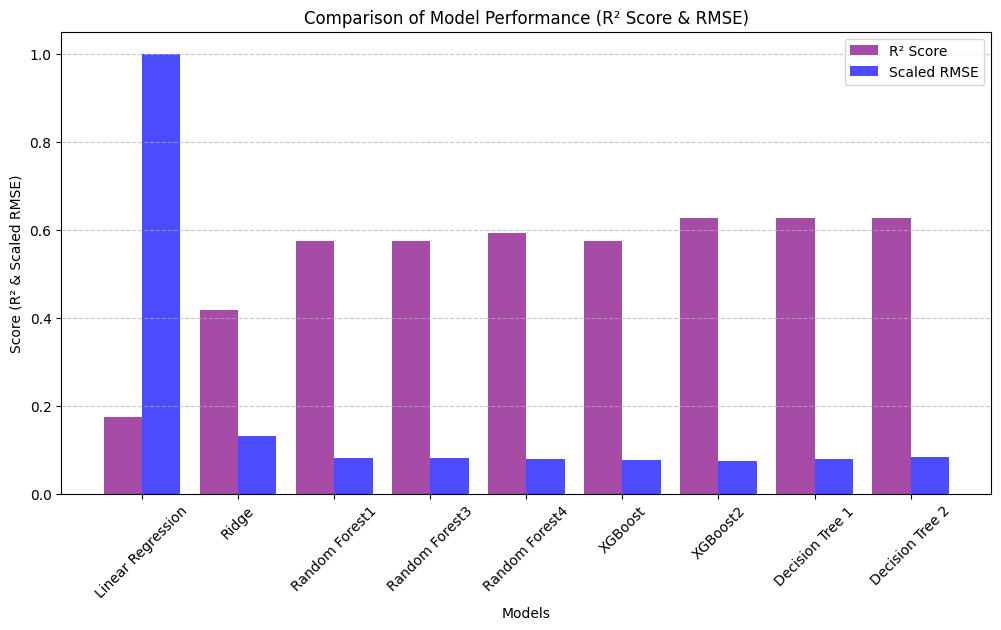

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Linear Regression', 'Ridge', 'Random Forest1', 'Random Forest3',
          'Random Forest4', 'XGBoost', 'XGBoost2', 'Decision Tree 1', 'Decision Tree 2']

# R² Scores
r2_scores = [0.1749, 0.4183, 0.5739, 0.5739, 0.5920, 0.5739, 0.6261, 0.6261, 0.6273]

# RMSE Values (Example values, replace with your actual RMSEs)
rmse_values = [34557.211975268437,4557.21197491928,2789.9490603809186,2802.015894911293,2701.67921520848,2616.9561832842455,2563.2343328445663,2737.1997518828593,2868.2557451090747]

# Setting up bar positions
x = np.arange(len(models))  # Model positions
width = 0.4  # Bar width

# Creating the figure and axis
plt.figure(figsize=(12, 6))

# Plot R² Score
plt.bar(x - width/2, r2_scores, width, color='purple', alpha=0.7, label="R² Score")

# Plot RMSE (scaled to match R² range for visualization)
plt.bar(x + width/2, np.array(rmse_values) / max(rmse_values), width, color='blue', alpha=0.7, label="Scaled RMSE")

# Labels and Titles
plt.xlabel("Models")
plt.ylabel("Score (R² & Scaled RMSE)")
plt.title("Comparison of Model Performance (R² Score & RMSE)")
plt.xticks(x, models, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert all values to strings before encoding
X['Product_ID'] = X['Product_ID'].astype(str)
test_input['Product_ID'] = test_input['Product_ID'].astype(str)

# Fit encoder and transform both sets
le.fit(pd.concat([X['Product_ID'], test_input['Product_ID']], axis=0))

X['Product_ID'] = le.transform(X['Product_ID'])
test_input['Product_ID'] = le.transform(test_input['Product_ID'])
# Replace '4+' with 4 and convert to integer
X['Stay_In_Current_City_Years'] = X['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)
test_input['Stay_In_Current_City_Years'] = test_input['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)


In [80]:
xgb2 = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

xgb2.fit(X,y)
predict = xgb2.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('Sample_Submission_XGB2.csv')


In [81]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb2})
df1 = df.head(25)
df1.head()

,Actual,Predicted
242122,4536.0,8339.625000
67572,4319.0,10119.305664
234898,15629.0,11792.033203
240921,15649.0,13666.375000
273564,12704.0,12261.214844


In [82]:
imp = pd.DataFrame(xgb2.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
Product_Category_1,0.795159
Product_ID,0.039936
City_Category_C,0.031584
Product_Category_2,0.020398
City_Category_B,0.016622
Age,0.016418
Marital_Status,0.016393
User_ID,0.016210
Occupation,0.016159
Stay_In_Current_City_Years,0.015793


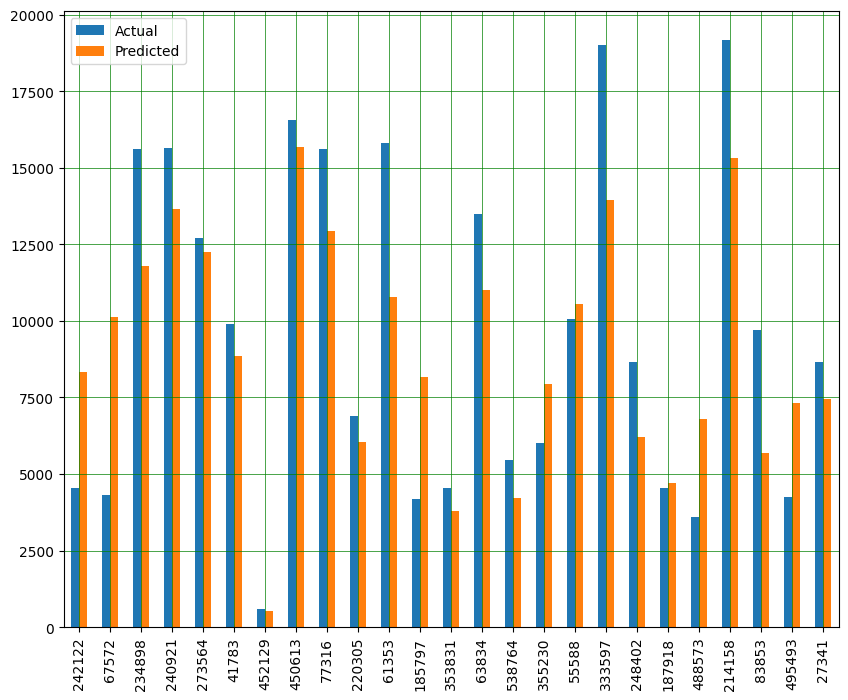

In [83]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

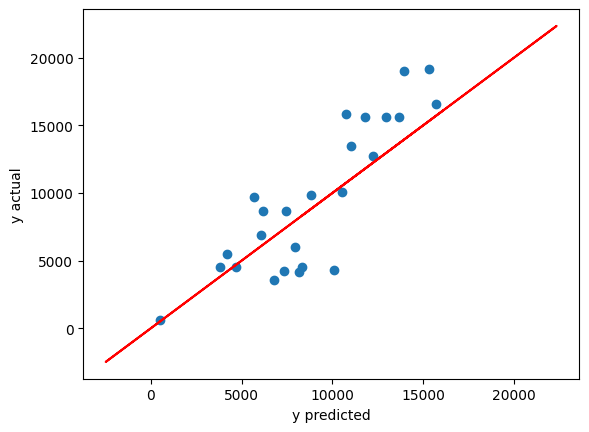

In [84]:
plt.scatter(df1.Predicted,df1.Actual)
plt.plot(y_pred_xgb2,y_pred_xgb2,'r')
plt.xlabel('y predicted')
plt.ylabel('y actual')
plt.show()

In [85]:
# Selecting only continuous numerical columns
continuous_columns = combined_cleaned.select_dtypes(include=['int64', 'float64'])

# Calculating statistics
summary_stats = continuous_columns.agg(['mean', 'median', 'min', 'max', 'var', 'std'])

# Display results
print(summary_stats)


             User_ID    Gender         Age  Occupation  \
mean    1.003029e+06  0.753007   35.041587    8.077182   
median  1.003075e+06  1.000000   31.000000    7.000000   
min     1.000001e+06  0.000000    9.000000    0.000000   
max     1.006040e+06  1.000000   60.000000   20.000000   
var     2.982566e+06  0.185988  126.102362   42.544308   
std     1.727011e+03  0.431263   11.229531    6.522600   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
mean                      1.858380        0.409628            5.272051   
median                    2.000000        0.000000            5.000000   
min                       0.000000        0.000000            1.000000   
max                       4.000000        1.000000           18.000000   
var                       1.661223        0.241833           13.973755   
std                       1.288884        0.491765            3.738149   

        Product_Category_2      Purchase  
mean              9.827072  9.2

In [86]:
print("Mean Purchase Amount (₹):", sales_1['Purchase'].mean())



Mean Purchase Amount (₹): 9264.078472050924


In [98]:
from google.colab import files
files.download('Sample_Submission_XGB2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>